In [1]:
include("./Functions.jl")
using .GPLM
using Random
using Plots
using LinearAlgebra
using Distributions
gr()

Plots.GRBackend()

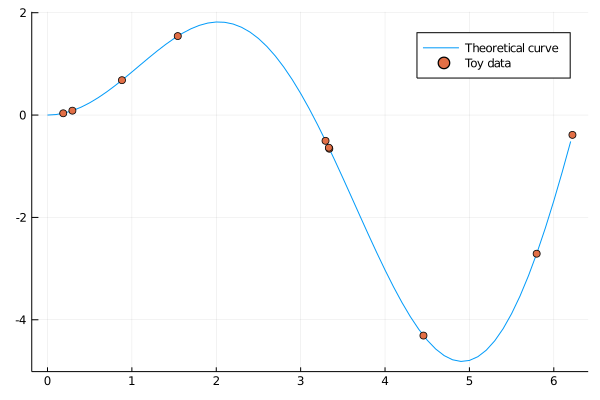

In [2]:
f(x)=x[1]*sin(x[1])
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
n(x)=[0]
plot(x,y, label="Theoretical curve")
X,Y=GPLM.ToyData(f,1,1,min=0,max=2π,messiness=n,N=10)
plot!(X,Y,seriestype=:scatter, label="Toy data")

In [8]:
k(x,x_,)=GPLM.GaussianKernel(x,x_,;th1=1,th2=1)

k (generic function with 1 method)

In [9]:
(μ,σ,K,K_,yy)=GPLM.GaussianProcessRegression(X,Y,k,x_test=[i for i in 0:0.1:2π],observationn_noise=0)

(Any[589229.0, 621847.5, 643926.0, 654710.0, 654485.0, 644484.0, 626898.0, 604694.0, 581486.0, 561188.0  …  -1.313358e6, -1.388712e6, -1.390122e6, -1.331806e6, -1.229364e6, -1.098118e6, -951976.0, -802665.0, -659320.0, -528267.0], Any[-2.0793921601600647, -4.0199038460575265, -8.105513312341149, -12.088838518462186, -1.7230610145608583, -3.304401230053407, -7.095383499636421, -11.296411014764914, -13.234218461769997, -16.55457489586489  …  5.848986599511919, -6.982450204279984, 4.294193546394894, 7.149222760442458, 1.7133710577502161, -6.481350329920799, 1.625897449492209, 1.830482731602193, -1.4602058442766541, -0.35572314992161536], [1.0 0.5808238302122292 … 9.132148035301674e-7 0.0005879531551381751; 0.5808238302122292 1.0 … 2.1732992824555965e-9 6.126337500272156e-6; … ; 9.132148035301674e-7 2.1732992824555965e-9 … 1.0 0.3666396264153047; 0.0005879531551381751 6.126337500272156e-6 … 0.3666396264153047 1.0], [3.5256570227995345e15 4.794374794446266e15 … -8.342302763178869e15 -1.1900

In [10]:
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
plot(x,y, label="Theoretical curve", dpi=300)
plot!(x_test,μ, label="Predicted curve")
plot!(X,Y,seriestype=:scatter, label="toydata")
plot!(x_test,μ+2 .*σ, label="+2signma")
plot!(x_test,μ-2 .*σ,label="-2signma")
savefig("f1.png")

In [11]:
(μ,σ,K,K_,yy)=GPLM.GaussianProcessRegression(X,Y,k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.01)

(Any[-0.10090136516814141, -0.018961867167448077, 0.03127524590255604, 0.047605573354339015, 0.03652140477748134, 0.013259386861598443, -0.00011088613425158655, 0.02156958669728226, 0.10156486473371729, 0.25599341917461516  …  -4.1876069604097665, -4.007881160741164, -3.7917192885769566, -3.52472548574508, -3.1923789303618832, -2.7846378840254147, -2.299808107708941, -1.7467818689976156, -1.145164078578219, -0.5232960726951887], Any[0.006276045068691616, 0.0021674640088142905, 0.0012206420100387971, 0.0013097041072388516, 0.001488468696816736, 0.0015285330321316293, 0.0014729431153271966, 0.0013824029848275021, 0.0012771718685539168, 0.001171149619302203  …  0.001470493418218699, 0.0019083422764155644, 0.002536649462719809, 0.00339414141873573, 0.004382175877575056, 0.005201394665102943, 0.005418062087524045, 0.004723983653295183, 0.003372042525426222, 0.0026603664341777744], [1.01 0.5808238302122292 … 9.132148035301674e-7 0.0005879531551381751; 0.5808238302122292 1.01 … 2.173299282455

In [12]:
f(x)=x[1]*sin(x[1])
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
n(x)=[0.3]
plot(x,y, label="Theoretical curve", dpi=300)
X,Y=GPLM.ToyData(f,1,1,min=0,max=2π,messiness=n,N=10)
plot!(X,Y,seriestype=:scatter, label="Toy data")
(μ,σ,K,K_,yy)=GPLM.GaussianProcessRegression(X,Y,k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.3)
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
plot!(x_test,μ, label="Predicted curve")
plot!(x_test,μ+2 .*σ, label="+2signma")
plot!(x_test,μ-2 .*σ,label="-2signma")
savefig("f2.png")

In [13]:
f(x)=x[1]*sin(x[1])
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
n(x)=[sin(x[1])]
plot(x,y, dpi=300)
X,Y=GPLM.ToyData(f,1,1,min=0,max=2π,messiness=n,N=100)
plot!(X,Y,seriestype=:scatter)
savefig("f3.png")